# 1. Pre-processing

### Libraries

In [1]:
import sys
sys.path.append('..')
from _utils.BattLeDIM_utils import *

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:314: SyntaxWarning: invalid escape sequence '\V'
  ax.set_ylabel('$\Vert MRE_{s}(t) \Vert_F$',fontsize=24)


### Data loading

In [2]:
scada_data = SCADA_data()
path_scada = '../_utils/Data/SCADA_data/2019/'
scada_data.load(path_scada)

### General information

In [3]:
dct_n2dma = dict({'DMA_A':['n54','n105','n114','n163','n188','n288','n296',
                           'n332','n342','n410','n415','n429','n458','n469',
                           'n495','n506','n516','n519','n549','n613','n636',
                           'n644','n679','n722', 'n726','n740','n752','n769'],
                  'DMA_B':['n215','n229'],
                  'DMA_C':['n1','n4','n31'],
                  'AMR_n':['n1','n2','n3','n4','n6','n7','n8','n9','n10','n11','n13',
                           'n16','n17','n18','n19','n20','n21','n22','n23','n24','n25',
                           'n26','n27','n28','n29','n30','n31','n32','n33','n34','n35',
                           'n36','n39','n40','n41','n42','n43','n44','n45',
                           'n343','n344','n345','n346','n347','n349','n350','n351','n352',
                           'n353','n354','n355','n356','n357','n358','n360','n361','n362',
                           'n364','n365','n366','n367','n368','n369','n370','n371','n372',
                           'n373','n374','n375','n376','n377','n378','n379','n381','n382',
                           'n383','n384','n385','n386','n387','n388','n389']})

In [4]:
sampling_rate='5min'

In [5]:
detections = dict()

### Ground truth

In [6]:
path_ground_truth = '../_utils/Data/leak_ground_truth/2019_Leakages.csv'
leak_signals, df_overview = load_trajectories_true(path_ground_truth)
df_overview = df_overview.T

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_leak_overview.loc['delta_v_expert', pipe] = df_leak_ts[pipe].cumsum().loc[:t_annotation][-2]/12  # from 1m³ per hour in 5min resolution
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_leak_overview.loc['delta_v_expert', pipe] = df_leak_ts[pipe].cumsum().loc[:t_annotation][-2]/12  # from 1m³ per hour in 5min resolution
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:133: FutureWarning: Series.__getit

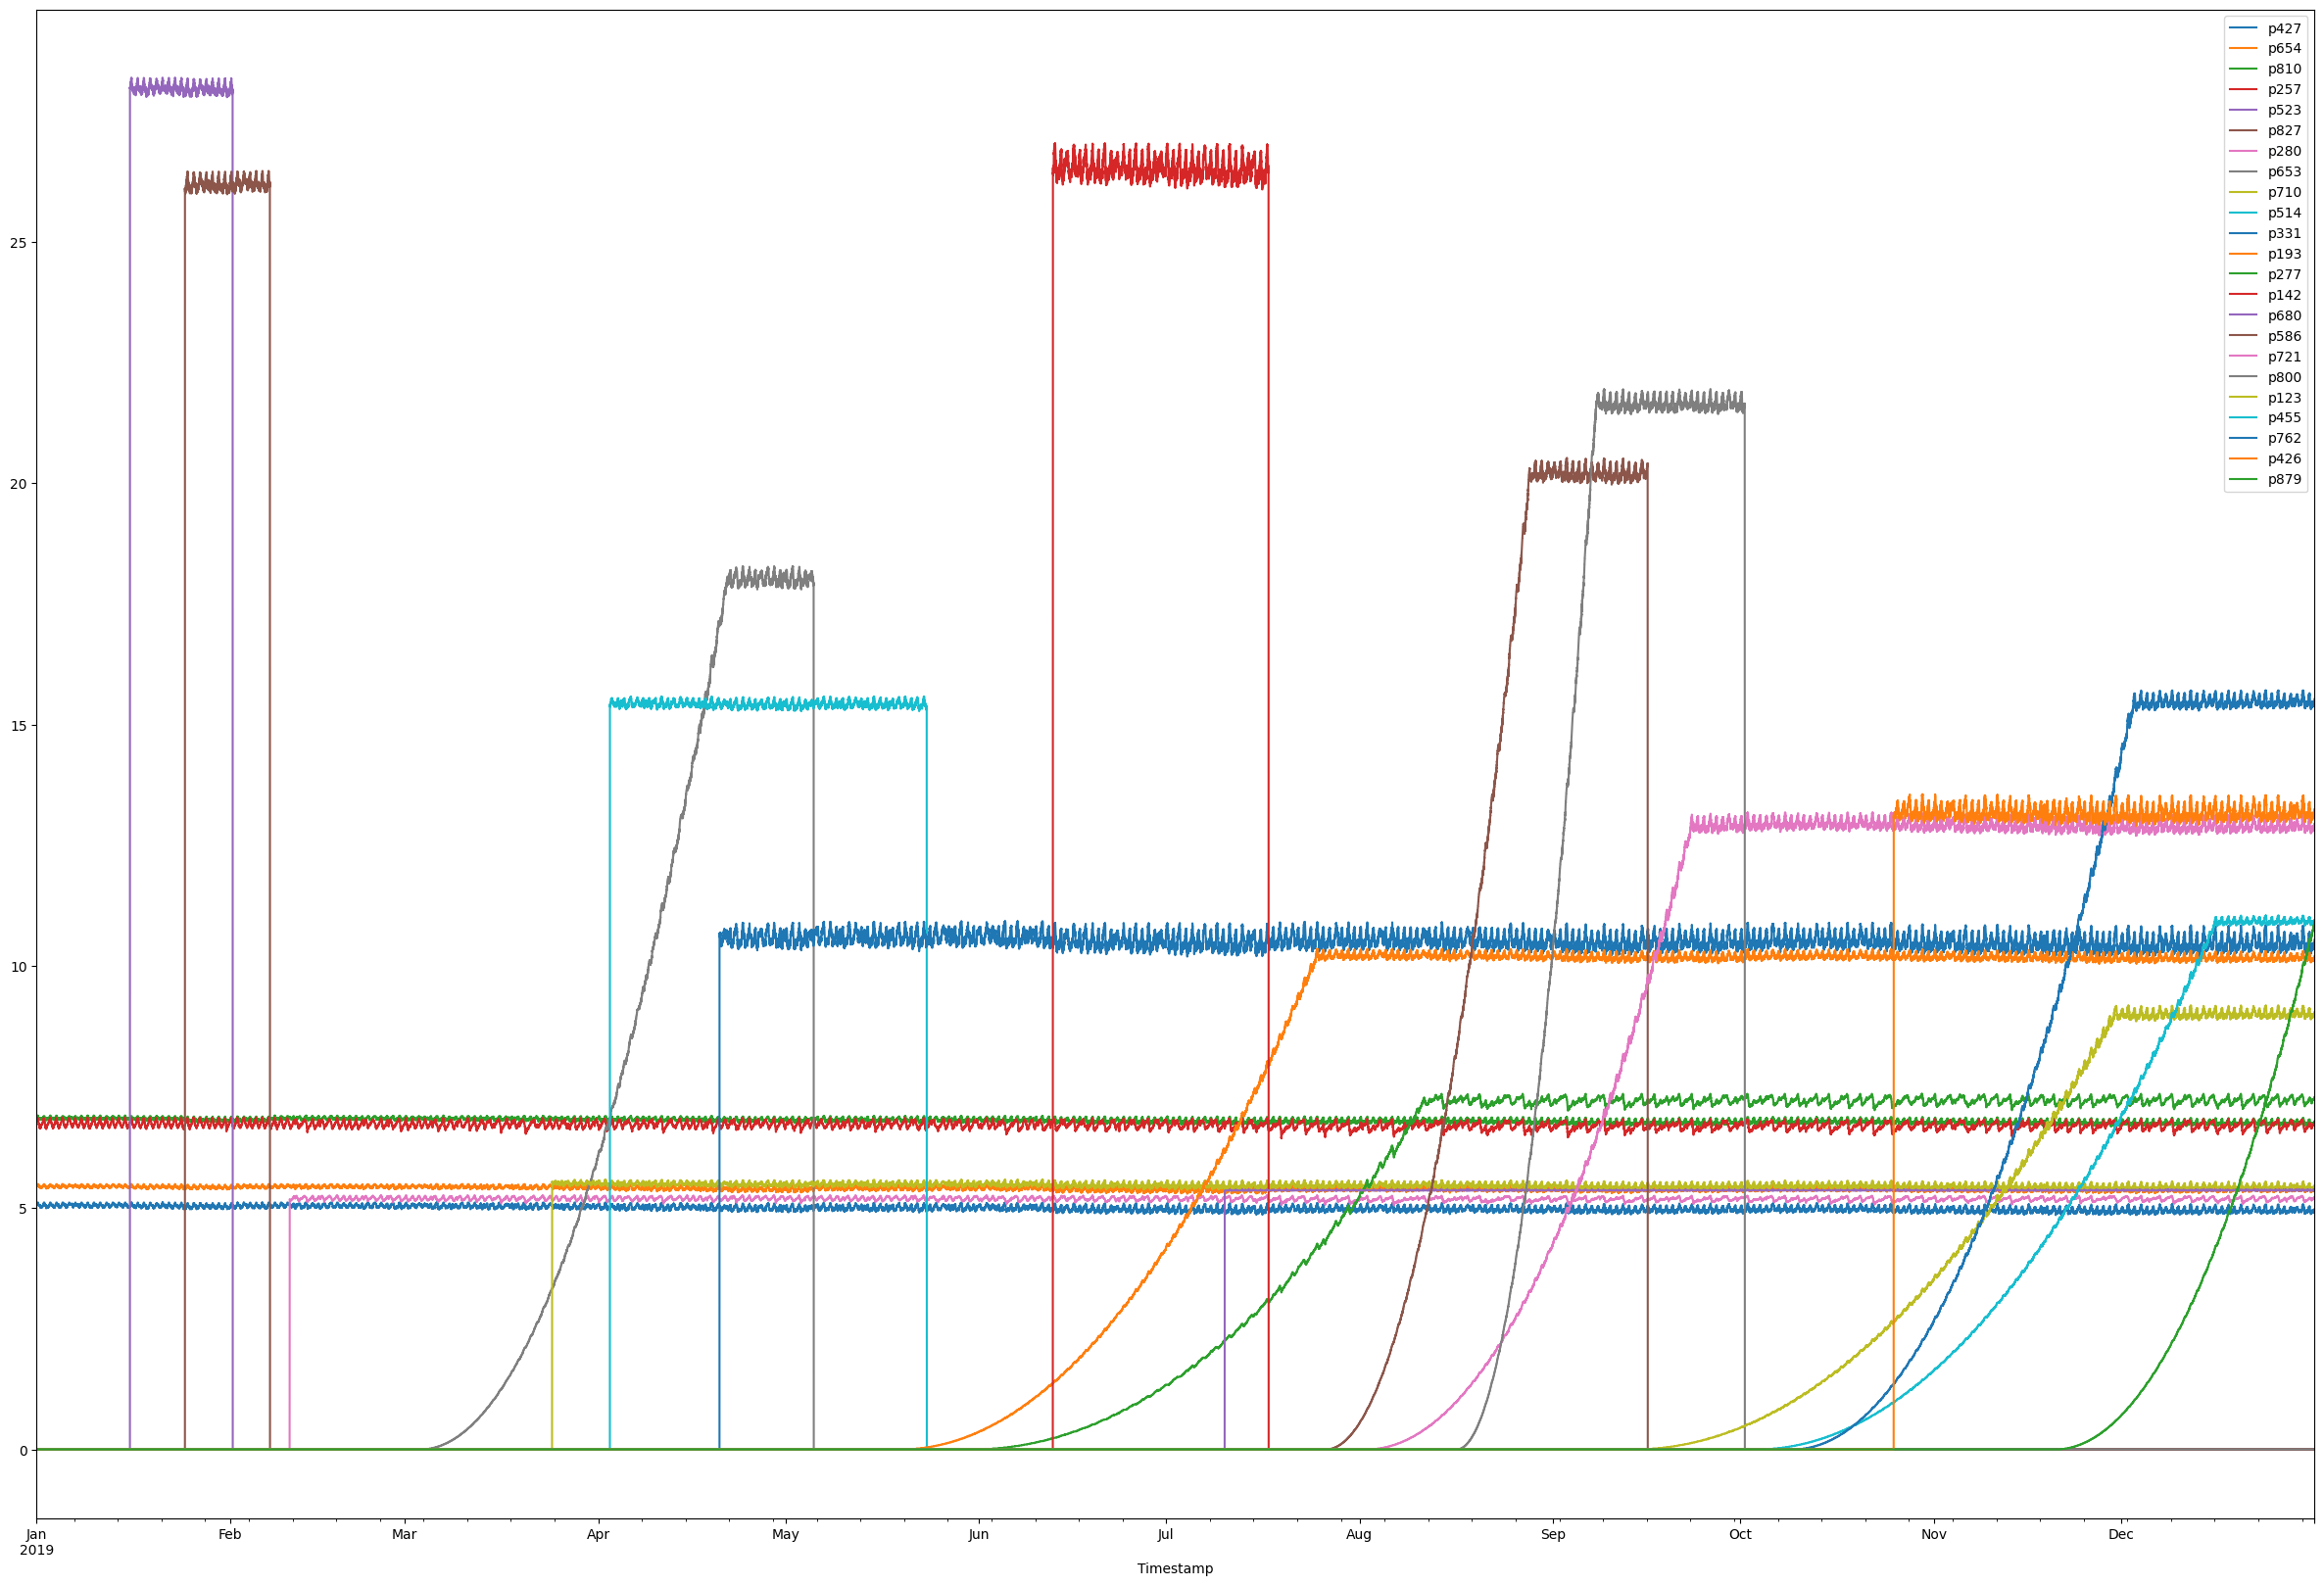

In [7]:
plt.style.use(['default'])
f,ax = plt.subplots(1,sharex=True,sharey=True,figsize=(30,20))
locator = mdates.AutoDateLocator(minticks=7, maxticks=15)
formatter = mdates.ConciseDateFormatter(locator)
formatter.offset_formats[2] = '%Y'

lc = leak_signals.plot(ax=ax)

# 2. Analysis

### General analysis

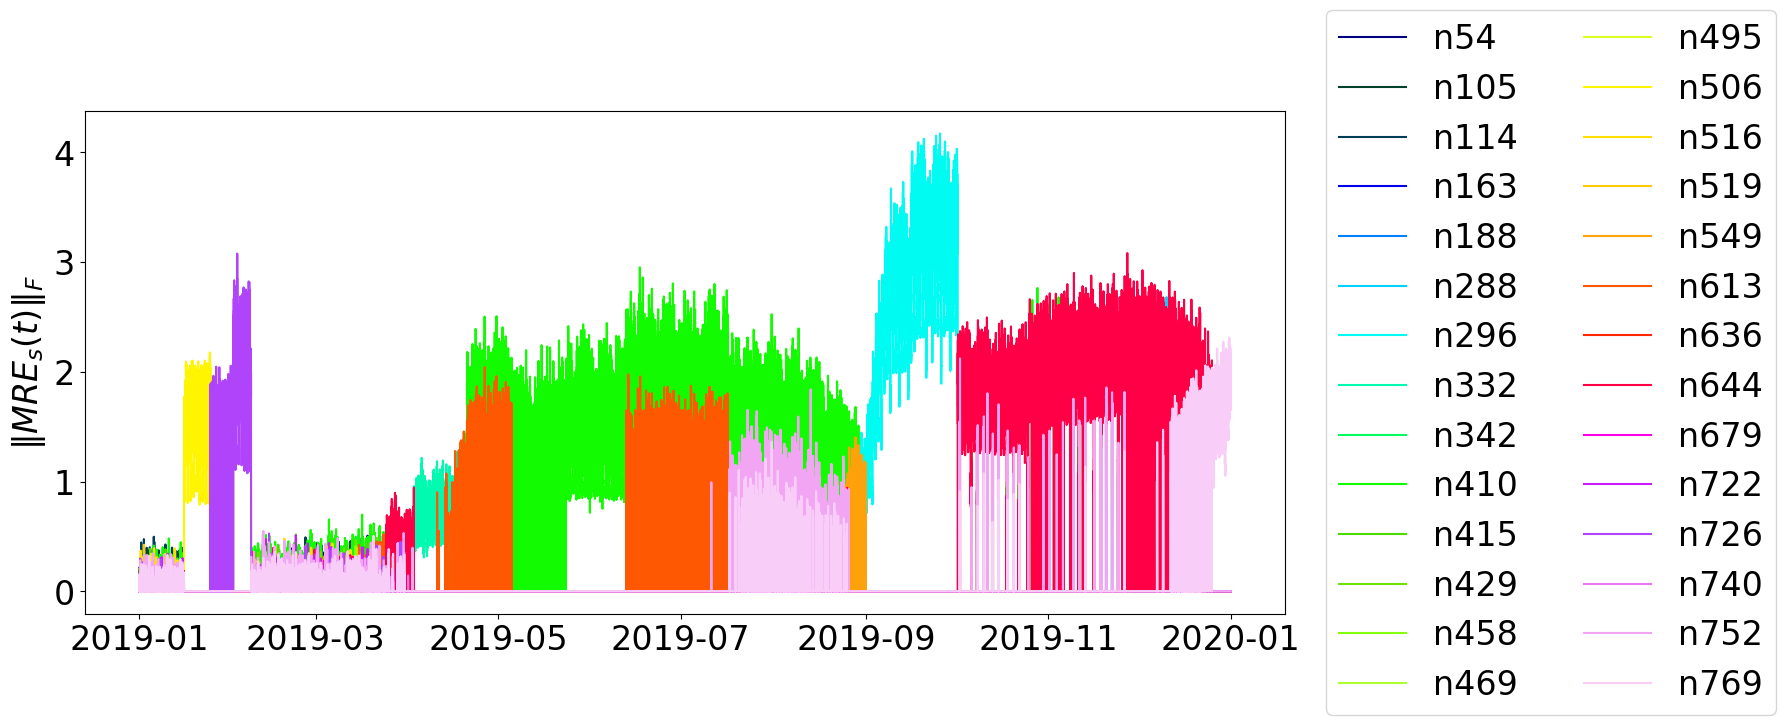

In [8]:
cor_time_frame = ['2019-01-01 00:00','2019-01-10 00:00']
MRE_A = leak_analysis(dct_n2dma['DMA_A'],scada_data,cor_time_frame)
plot_MRE(MRE_A)

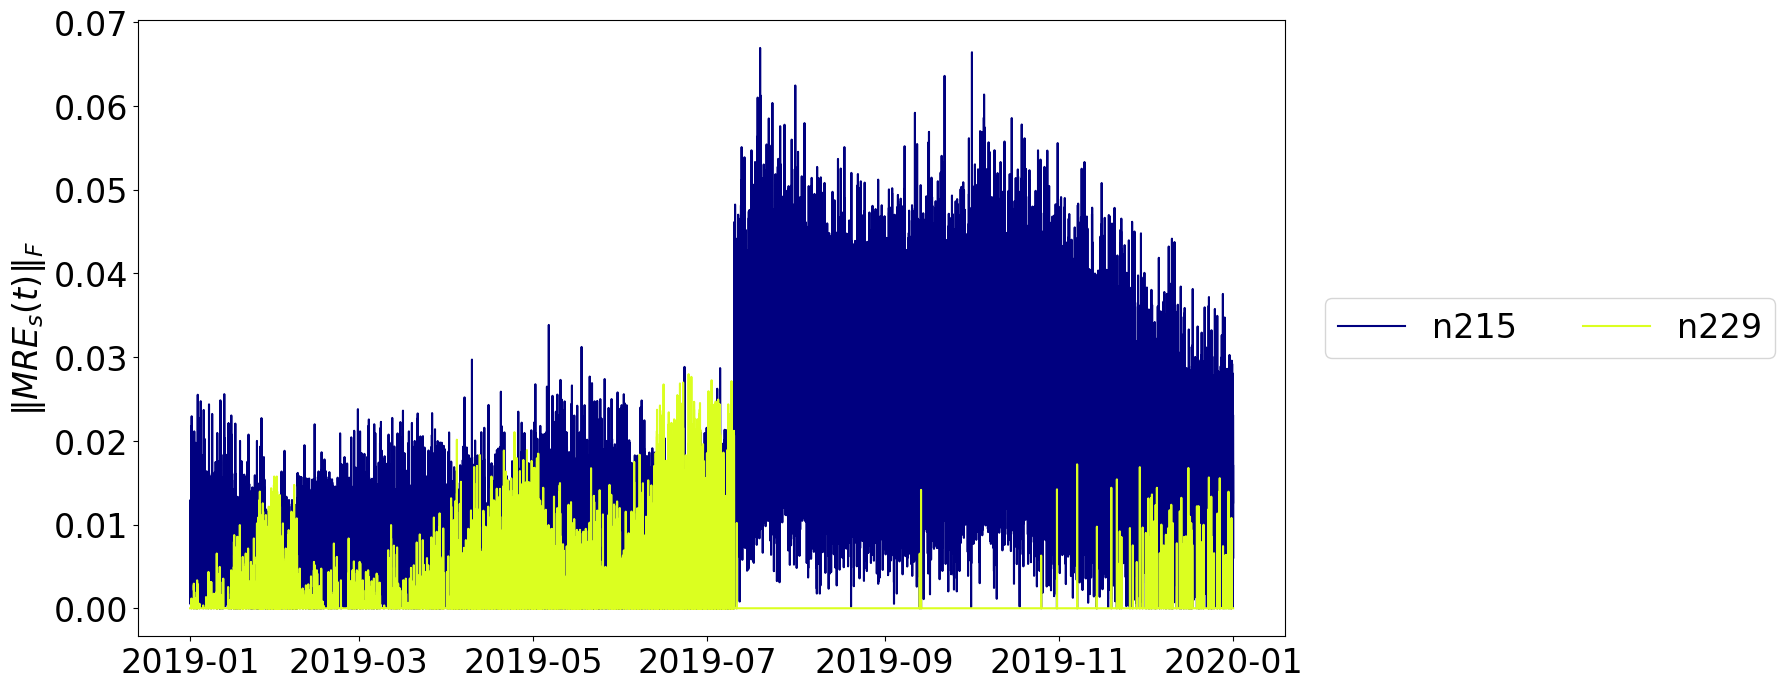

In [9]:
cor_time_frame = ['2019-06-15 00:00','2019-06-30 00:00']
MRE_B = leak_analysis(dct_n2dma['DMA_B'],scada_data,cor_time_frame)
plot_MRE(MRE_B)

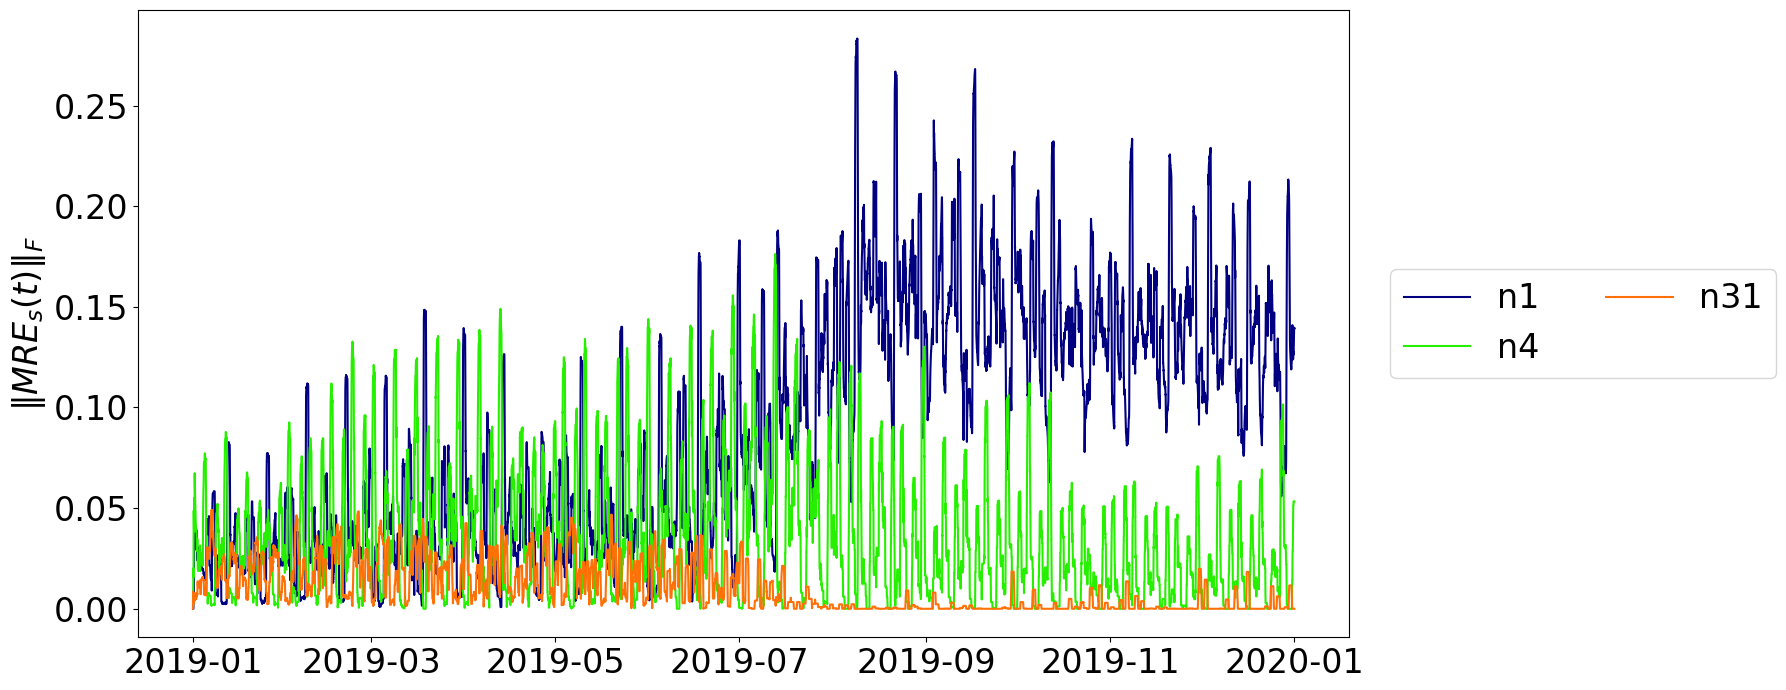

In [10]:
cor_time_frame = ['2019-01-01 00:00','2019-01-15 00:00']
MRE_C = leak_analysis(dct_n2dma['DMA_C'],scada_data,cor_time_frame)
plot_MRE(MRE_C,roll='D')

### Leak 1

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-01-15 23:00:00
True leak start on 2019-01-15 23:00:00
Time to detection 0 days 00:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1328561353.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1328561353.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1328561353.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

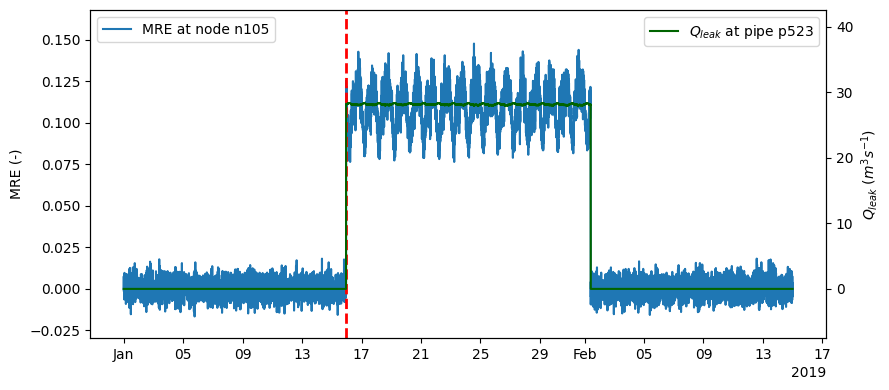

In [11]:
# general information
node_MAS = 'n506'
closest_nodes = ['n105']
pipe_id = 'p523'

# calibration time frame
time_frame_list = [['2019-01-01 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-01-24 18:25'], 
                   ['2019-01-24 18:30','2019-02-03 00:00','2019-02-06 00:00','2019-02-07 09:05'], 
                   ['2019-02-07 09:10','2019-01-05 00:00','2019-01-09 00:00','2019-02-15 00:00']]

# linear regression analysis
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)

# change point detection 
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])

# saving the detection
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}

# writing time to detection and leaked volume to 'df_overview'
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12

# printing results
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))

# plotting results
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 2

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-01-24 18:30:00
True leak start on 2019-01-24 18:30:00
Time to detection 0 days 00:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\246293932.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\246293932.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\246293932.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

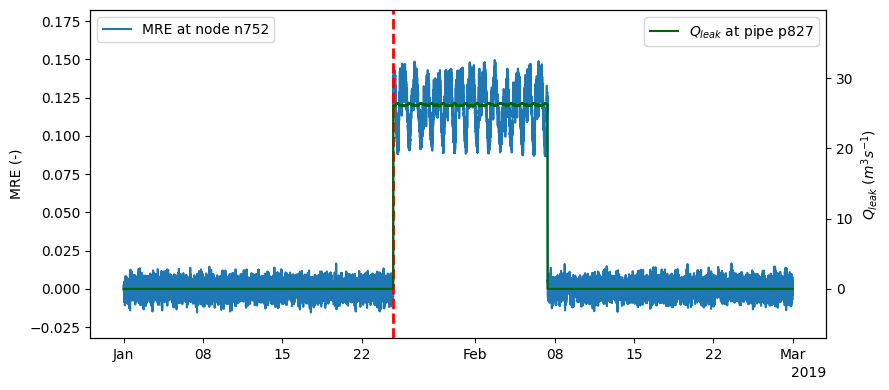

In [12]:
node_MAS = 'n726'
closest_nodes = ['n752']
pipe_id = 'p827'

time_frame_list = [['2019-01-01 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-01-15 22:55'],
                   ['2019-01-15 23:00','2019-01-18 00:00','2019-01-20 00:00','2019-02-01 09:50'],
                   ['2019-02-01 09:55','2019-01-05 00:00','2019-01-09 00:00','2019-03-01 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 3

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-02-15 09:15:00
True leak start on 2019-02-10 13:05:00
Time to detection 4 days 20:10:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1875595526.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1875595526.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1875595526.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

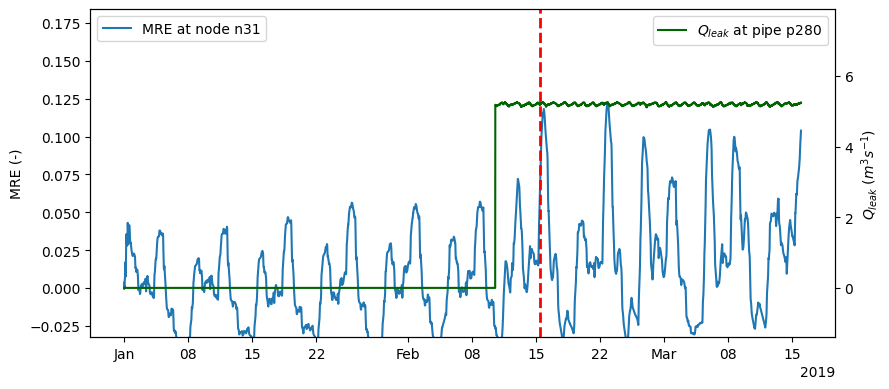

In [13]:
node_MAS = 'n4'
closest_nodes = ['n31']
pipe_id = 'p280'

time_frame_list = [['2019-01-01 00:00','2019-01-15 00:00','2019-01-30 00:00','2019-03-15 22:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]], delta=1, C_thr=300, est_length='7 days')
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],roll='D',
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 4

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-03-12 19:40:00
True leak start on 2019-03-03 13:10:00
Time to detection 9 days 06:30:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\859297452.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\859297452.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\859297452.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

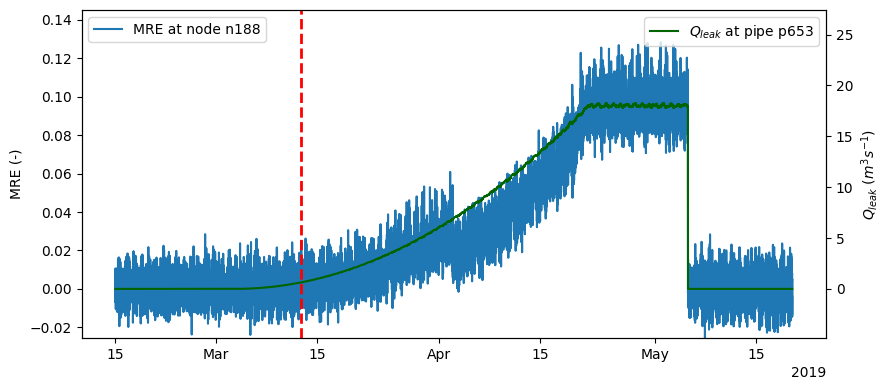

In [14]:
node_MAS = 'n613'
closest_nodes = ['n188']
pipe_id = 'p653'

time_frame_list = [['2019-02-15 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-04-02 20:35'],
                   ['2019-04-02 20:40','2019-05-08 00:00','2019-05-15 00:00','2019-05-20 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 5

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-03-24 16:15:00
True leak start on 2019-03-24 14:15:00
Time to detection 0 days 02:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2444025137.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2444025137.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2444025137.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

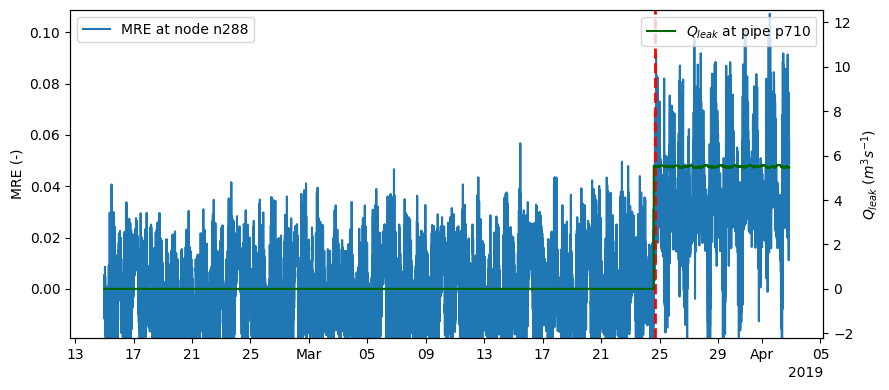

In [15]:
node_MAS = 'n644'
closest_nodes = ['n288']
pipe_id = 'p710'

time_frame_list = [['2019-02-15 00:00','2019-03-10 00:00','2019-03-19 00:00','2019-04-02 20:35']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 6

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-04-02 20:50:00
True leak start on 2019-04-02 20:40:00
Time to detection 0 days 00:10:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3108702236.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3108702236.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3108702236.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

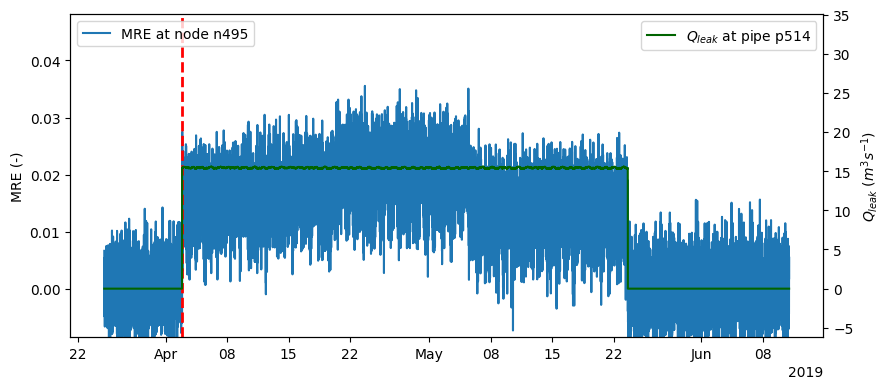

In [16]:
node_MAS = 'n332'
closest_nodes = ['n495']
pipe_id = 'p514'

time_frame_list = [['2019-03-25 00:00','2019-03-27 00:00','2019-03-31 00:00','2019-04-20 14:20'],
                   ['2019-04-20 14:25','2019-05-25 00:00','2019-05-30 00:00','2019-06-10 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 7

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-04-20 10:10:00
True leak start on 2019-04-20 10:10:00
Time to detection 0 days 00:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1699825402.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1699825402.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1699825402.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

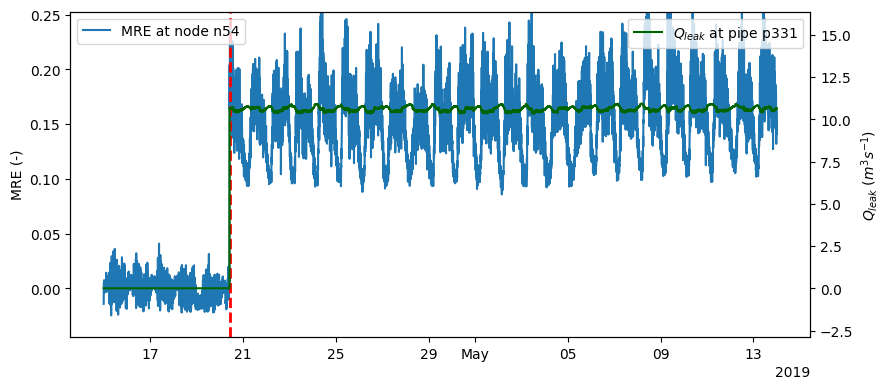

In [17]:
node_MAS = 'n410'
closest_nodes = ['n54']
pipe_id = 'p331'

time_frame_list = [['2019-04-15 00:00','2019-04-15 00:00','2019-04-20 00:00','2019-05-14 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 8

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\10710

Leak detected on 2019-06-16 13:25:00
True leak start on 2019-05-19 10:40:00
Time to detection 28 days 02:45:00


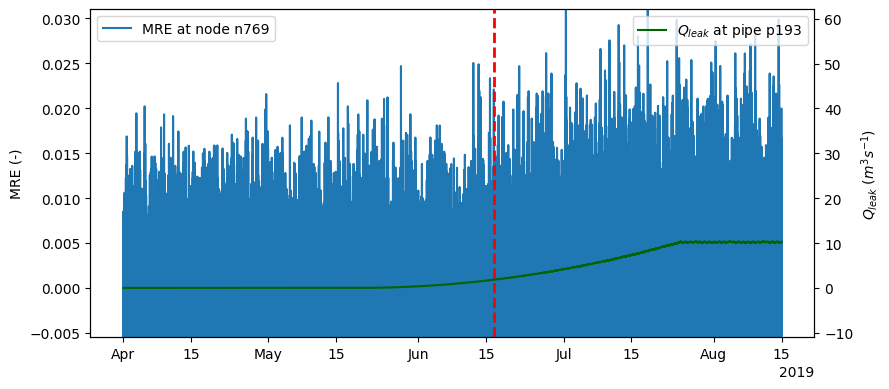

In [18]:
node_MAS = 'n752'
closest_nodes = ['n769']
pipe_id = 'p193'

time_frame_list = [['2019-04-01 00:00','2019-04-01 00:00','2019-05-09 00:00','2019-08-15 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=4)

### Leak 9

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-07-15 18:25:00
True leak start on 2019-05-30 21:55:00
Time to detection 45 days 20:30:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1316916260.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1316916260.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1316916260.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

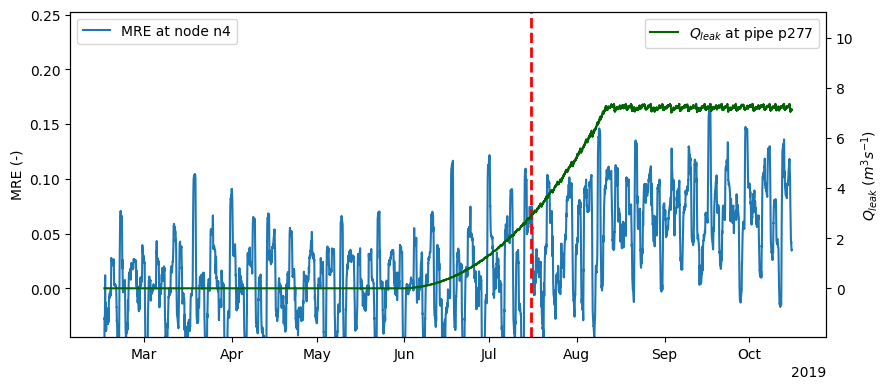

In [19]:
node_MAS = 'n1'
closest_nodes = ['n4']
pipe_id = 'p277'

time_frame_list = [['2019-02-15 00:00','2019-03-01 00:00','2019-04-20 00:00','2019-10-15 22:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]], delta=1, C_thr=300, est_length='14 days')
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],roll='D',
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 10

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-06-12 19:55:00
True leak start on 2019-06-12 19:55:00
Time to detection 0 days 00:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3154888678.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3154888678.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3154888678.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

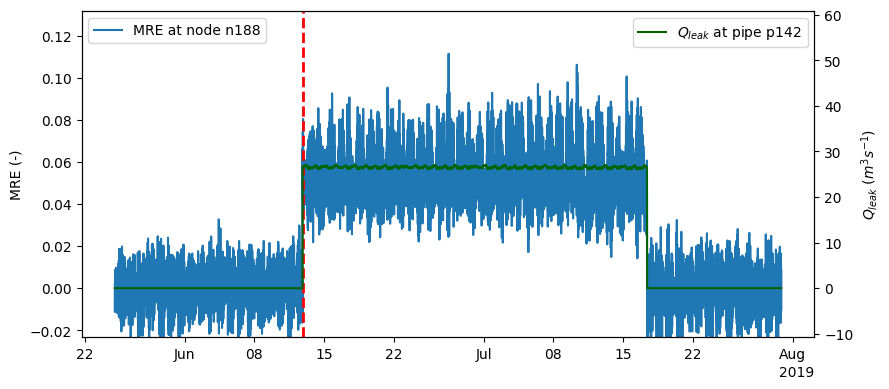

In [20]:
node_MAS = 'n613'
closest_nodes = ['n188']
pipe_id = 'p142'

time_frame_list = [['2019-05-25 00:00','2019-05-30 00:00','2019-06-05 00:00','2019-07-10 10:10'],
                   ['2019-07-10 10:10','2019-07-22 00:00','2019-07-24 00:00','2019-07-30 20:30']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 11

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-07-10 09:50:00
True leak start on 2019-07-10 08:45:00
Time to detection 0 days 01:05:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\80926901.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\80926901.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\80926901.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as

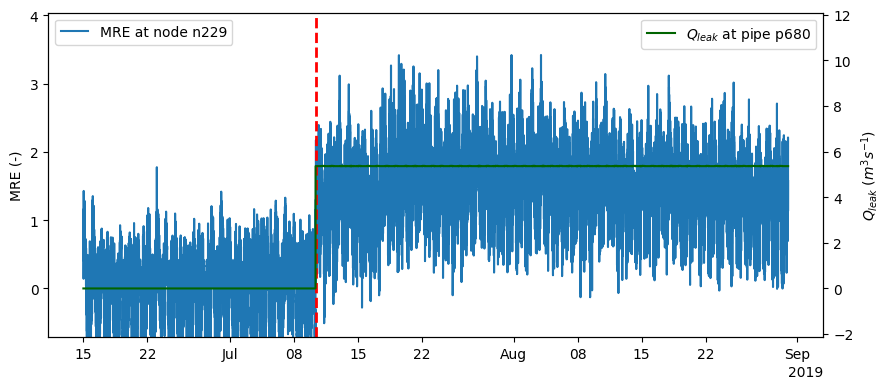

In [21]:
node_MAS = 'n215'
closest_nodes = ['n229']
pipe_id = 'p680'

time_frame_list = [['2019-06-15 00:00','2019-06-15 00:00','2019-06-30 00:00','2019-08-31 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 12

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-08-06 22:40:00
True leak start on 2019-07-26 14:40:00
Time to detection 11 days 08:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1569141291.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1569141291.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1569141291.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

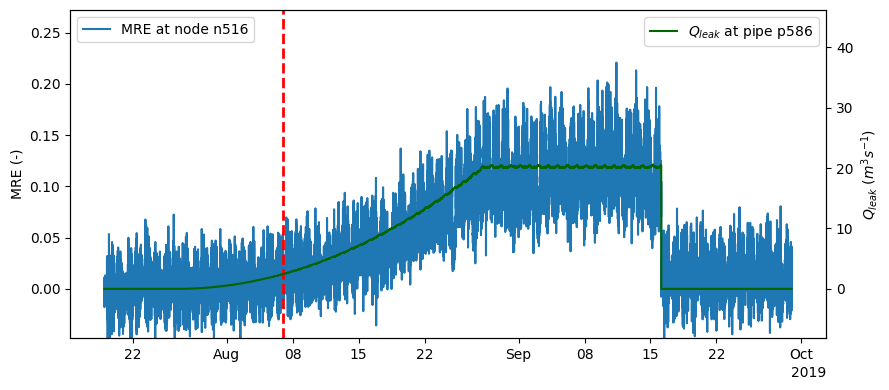

In [22]:
node_MAS = 'n549'
closest_nodes = ['n516']
pipe_id = 'p586'

time_frame_list = [['2019-07-19 00:00','2019-07-19 00:00','2019-07-25 00:00','2019-09-30 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 13

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-08-13 13:00:00
True leak start on 2019-08-02 03:00:00
Time to detection 11 days 10:00:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1254851087.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1254851087.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1254851087.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

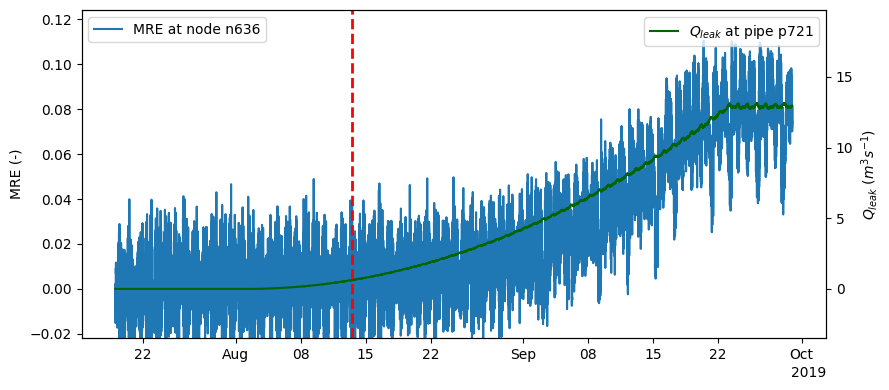

In [23]:
node_MAS = 'n644'
closest_nodes = ['n636']
pipe_id = 'p721'

time_frame_list = [['2019-07-19 00:00','2019-07-19 00:00','2019-07-25 00:00','2019-09-30 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 14

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]
c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\Batt

Leak detected on 2019-08-21 10:30:00
True leak start on 2019-08-16 14:00:00
Time to detection 4 days 20:30:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1159781020.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1159781020.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1159781020.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

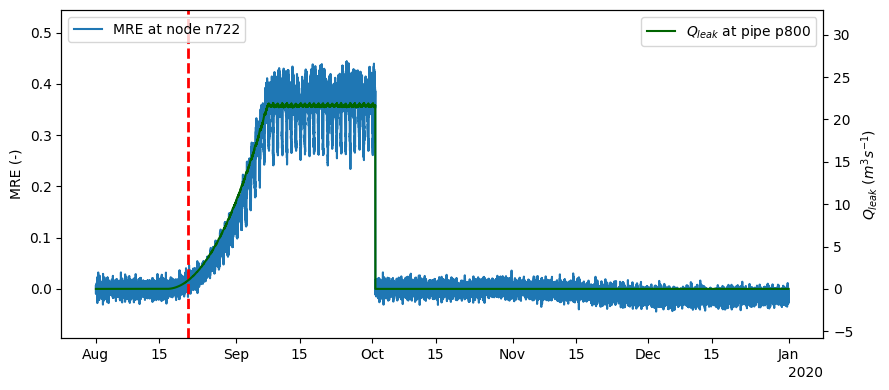

In [24]:
node_MAS = 'n296'
closest_nodes = ['n722']
pipe_id = 'p800'

time_frame_list = [['2019-08-01 00:00','2019-08-01 00:00','2019-08-09 00:00','2019-09-16 03:20'],
                   ['2019-09-16 03:20','2019-10-05 00:00','2019-10-09 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 15

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-10-24 10:10:00
True leak start on 2019-09-13 20:05:00
Time to detection 40 days 14:05:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2914314552.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2914314552.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2914314552.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

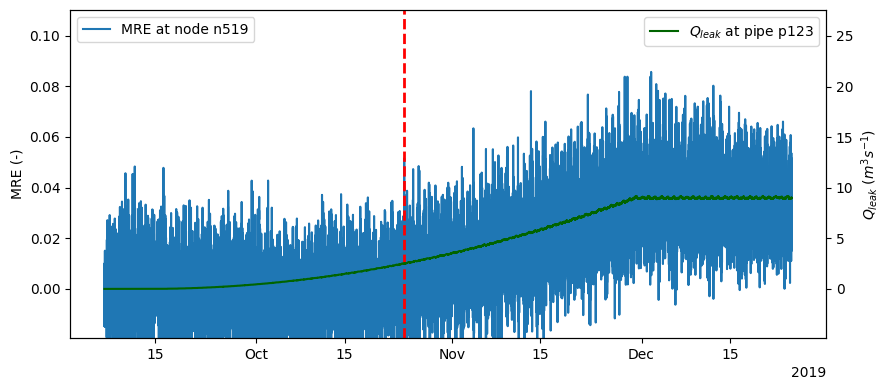

In [25]:
node_MAS = 'n163'
closest_nodes = ['n519']
pipe_id = 'p123'

time_frame_list = [['2019-09-07 00:00','2019-09-07 00:00','2019-09-12 00:00','2019-12-24 18:25']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=2)

### Leak 16

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-11-03 18:05:00
True leak start on 2019-10-03 14:00:00
Time to detection 31 days 04:05:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\225806626.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\225806626.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\225806626.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

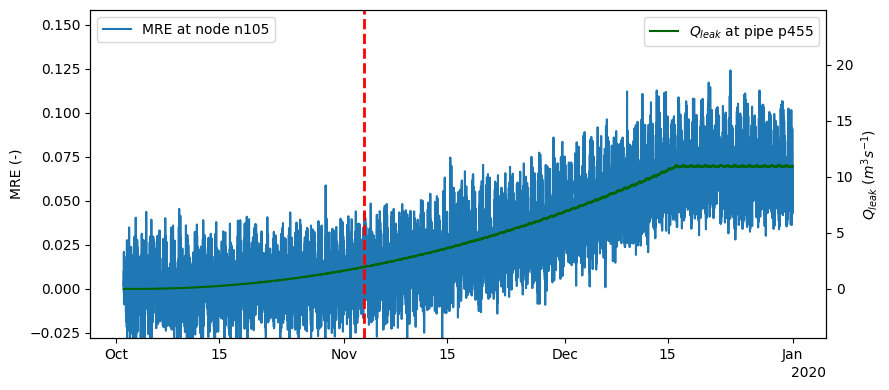

In [26]:
node_MAS = 'n114'
closest_nodes = ['n105']
pipe_id = 'p455'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 17

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-10-25 13:30:00
True leak start on 2019-10-09 10:15:00
Time to detection 16 days 03:15:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2147059214.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2147059214.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2147059214.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

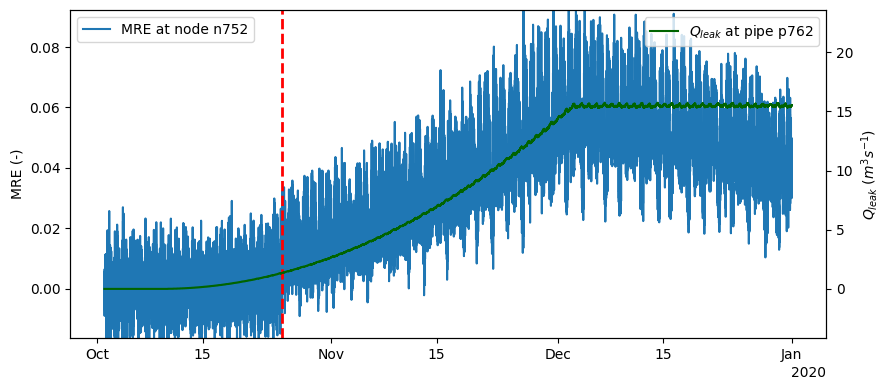

In [27]:
node_MAS = 'n288'
closest_nodes = ['n752']
pipe_id = 'p762'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 18

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-10-25 13:40:00
True leak start on 2019-10-25 13:25:00
Time to detection 0 days 00:15:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2046560607.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2046560607.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2046560607.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

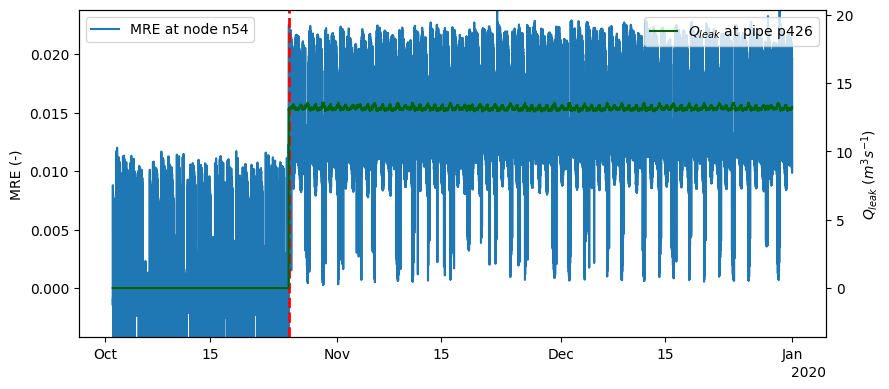

In [28]:
node_MAS = 'n429'
closest_nodes = ['n54']
pipe_id = 'p426'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 19

c:\Users\dingr\source\repos\LILA-main\LI\..\_utils\BattLeDIM_utils.py:294: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_state[node_cor].loc[start:end] = df_error['e'].loc[start:end]


Leak detected on 2019-11-22 08:10:00
True leak start on 2019-11-20 11:55:00
Time to detection 1 days 20:15:00


C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1120253324.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1120253324.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\1120253324.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

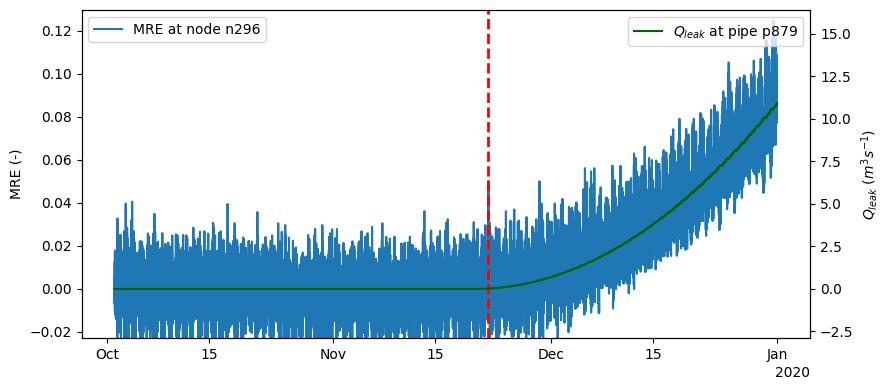

In [29]:
node_MAS = 'n740'
closest_nodes = ['n296']
pipe_id = 'p879'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-09 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

## Summary 

### Comparison plot of MRE vs. ground truth (Fig. 4)

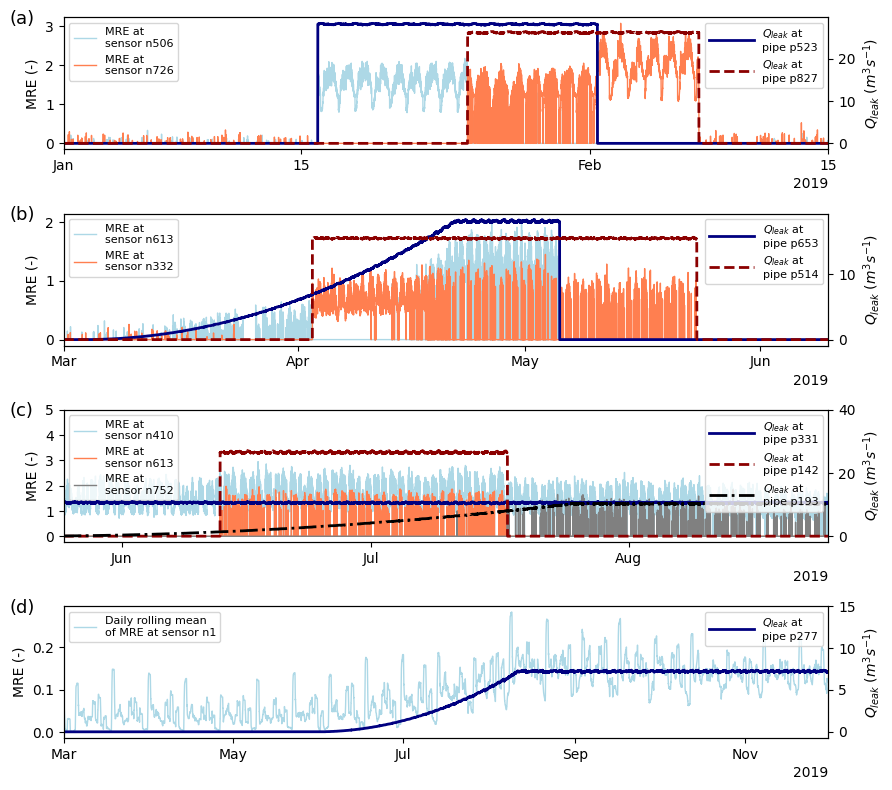

In [30]:
c_MAS = ['lightblue','coral','grey']
c_leak = ['navy','darkred','black']
leaks = [['p523','p827'],['p653','p514'],['p331','p142','p193'],['p277']]
xlim = [['2019-01','2019-02-15'],['2019-03','2019-06-10'],['2019-05-25','2019-08-25'],['2019-03','2019-12']]
ylim = [[0,0],[0,0],[-0.22,5],[0,0]]
y2lim = [[0,0],[0,0],[-1.8,40],[-0.75,15]]
title = ['a','b','c','d']
ls = ['-','--','-.']

f,axs = plt.subplots(4,sharex=False,figsize=(9,8))
for i_ax,ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.offset_formats[2] = '%Y'
    ax.get_xaxis().set_major_locator(locator)
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_xlim(pd.to_datetime(xlim[i_ax][0]),pd.to_datetime(xlim[i_ax][1]))
    ax.set_xlabel('')
    ax.set_ylabel('MRE (-)')
    ax.set_yticks([0,1,2,3,4,5,6])
    ax.text(-0.07,0.95,'({})'.format(title[i_ax]), transform=ax.transAxes,fontsize=13)
    ax2 = ax.twinx()
    ax2.set_ylabel('$Q_{leak}$ ($m^3 s^{-1}$)')
    if i_ax==3:
        ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
        
    for i,leak_id in enumerate(leaks[i_ax]):
        if leak_id =='p277':
            ax.plot(MRE_C[detections[leak_id]['MAS']].rolling('D').mean(),label='Daily rolling mean\nof MRE at sensor {}'.format(detections[leak_id]['MAS']),color=c_MAS[i],lw=1)
        else:
            ax.plot(MRE_A[detections[leak_id]['MAS']],label='MRE at\nsensor {}'.format(detections[leak_id]['MAS']),color=c_MAS[i],lw=1)
        ax2.plot(leak_signals[leak_id],label='$Q_{leak}$ at\npipe %(leak_id)s' %{'leak_id':leak_id},color=c_leak[i],ls=ls[i],lw=2)
    handles, labels = ax.get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc=2, prop={'size':8})
    handles, labels = ax2.get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax2.legend(handles, labels, loc=1, prop={'size':8},handlelength=4)
    if not (ylim[i_ax][0]==0 and ylim[i_ax][1]==0):
        ax.set_ylim(ylim[i_ax][0],ylim[i_ax][1])
    if not (y2lim[i_ax][0]==0 and y2lim[i_ax][1]==0):
        ax2.set_ylim(y2lim[i_ax][0],y2lim[i_ax][1])

f.tight_layout()
f.savefig('leakage_identification.png',dpi=300)
plt.show()

### Summary of single leakages in DMA A (Fig. 10)

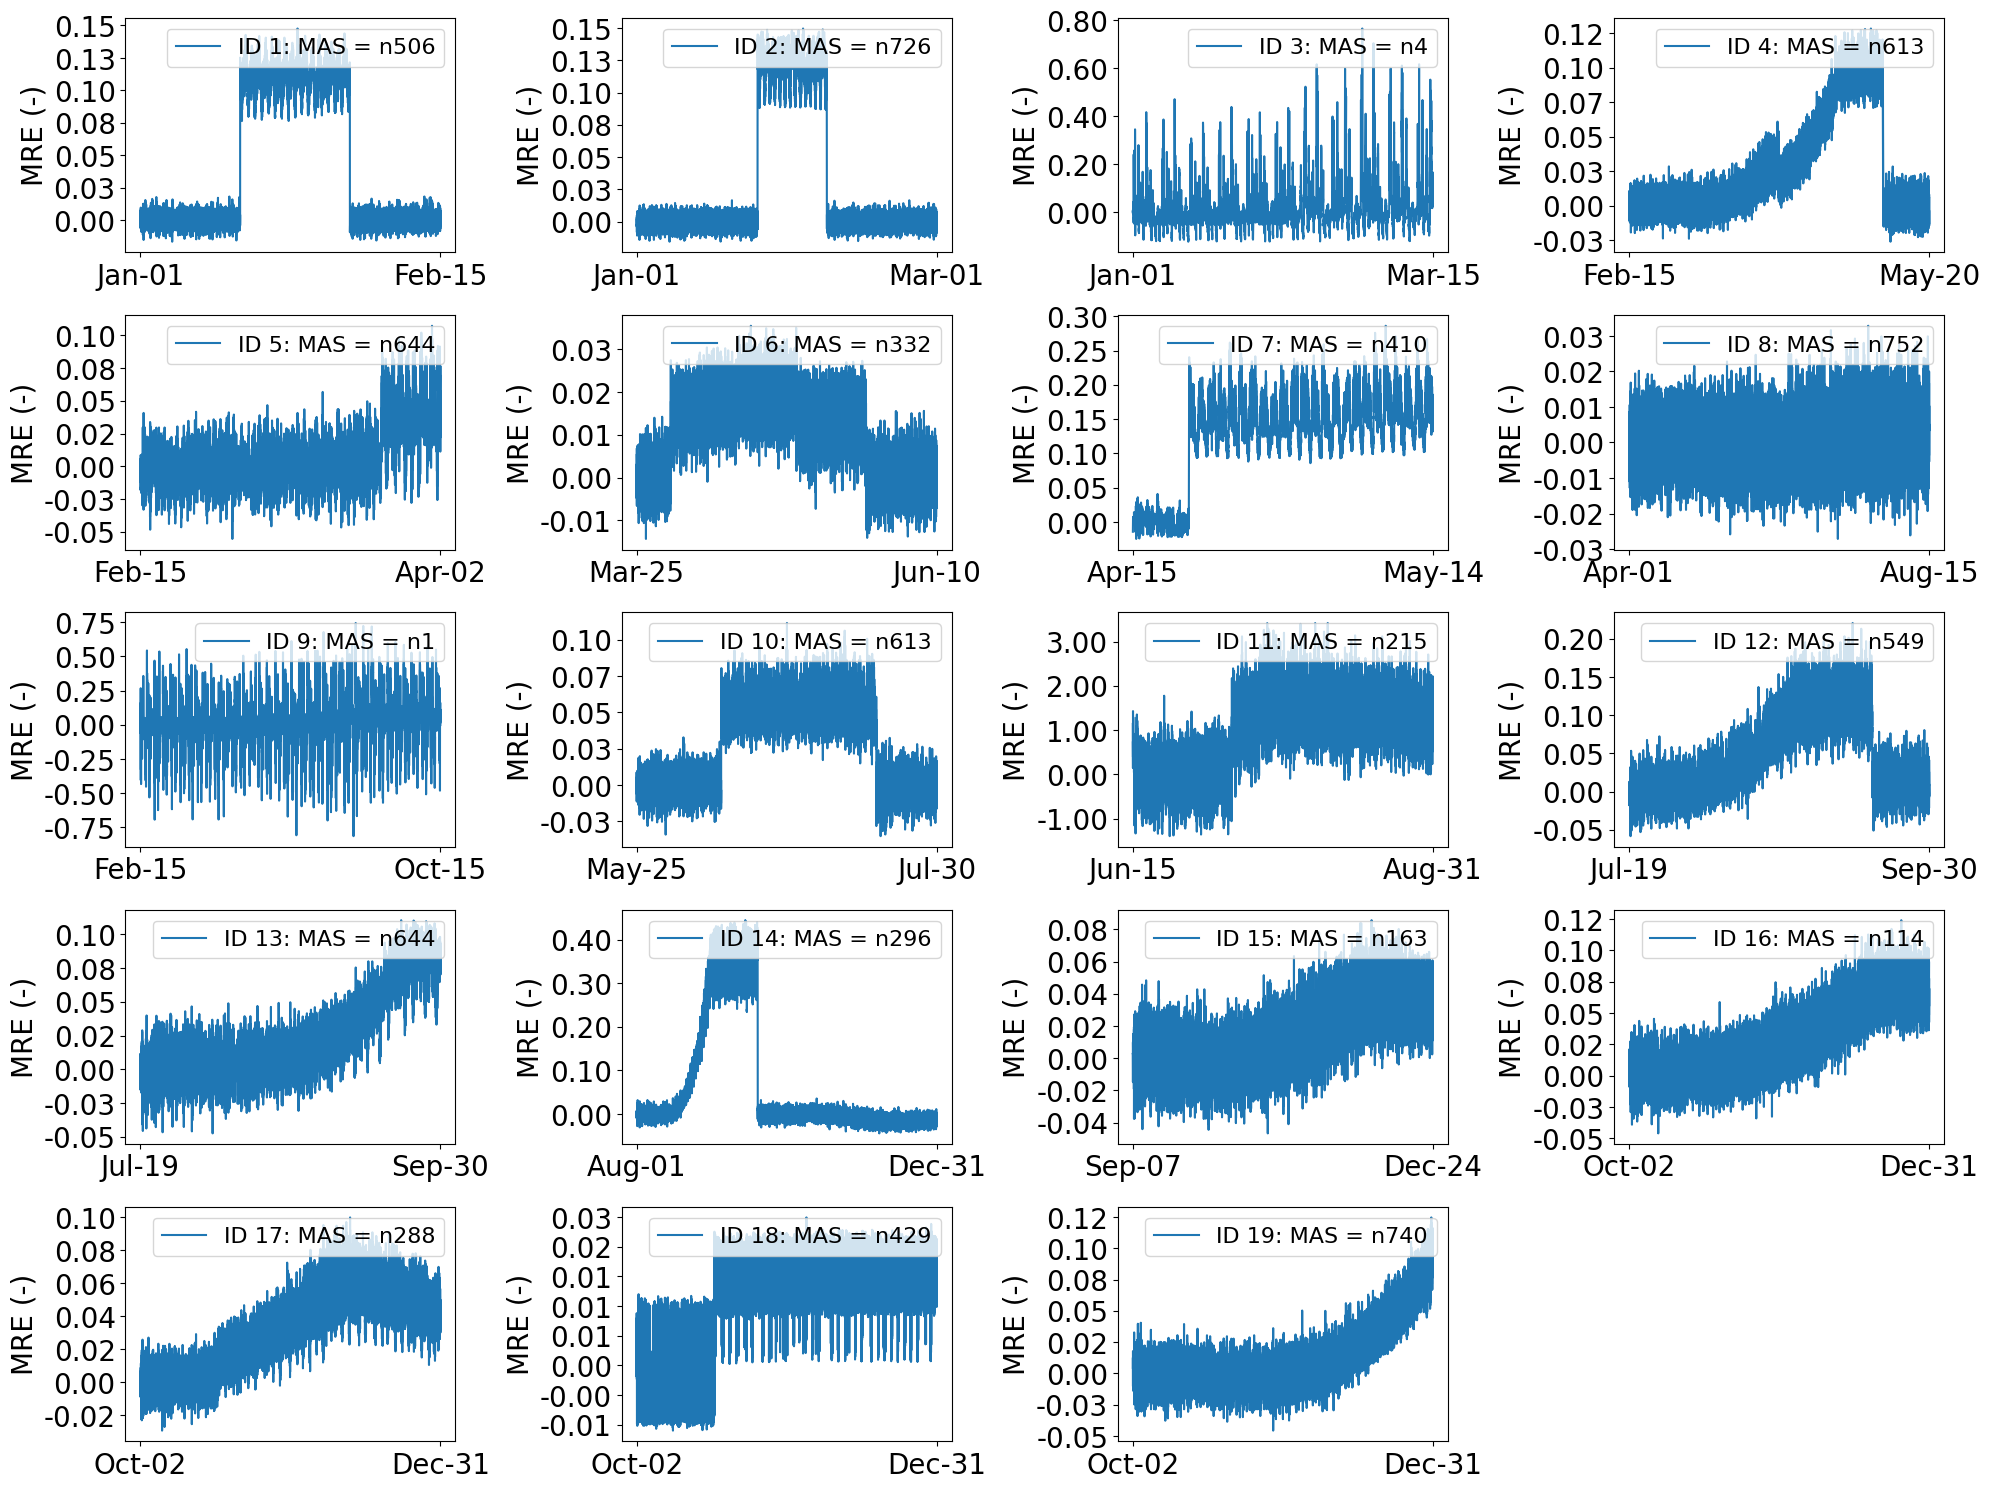

In [32]:
trajectories = pd.DataFrame(dtype=float)
for leak in detections:
    signal = detections[leak]['signal']
    trajectories[leak] = signal[signal.columns[0]]

plt.style.use(['default'])
f = plt.figure(figsize=(20,15))
for i,key in enumerate(list(detections.keys())):
    ax = f.add_subplot(5,4,(i+1))
    ax.plot(trajectories[key][trajectories[key]!=0],label='ID {}: MAS = {}'.format((i+1),detections[key]['MAS']))
    ax.set_xticks([pd.to_datetime(trajectories[key][trajectories[key]!=0].index[0]),
                        pd.to_datetime(trajectories[key][trajectories[key]!=0].index[-1])])
    ax.legend(loc=1,prop={'size':16})
    ax.set_ylabel('MRE (-)',fontsize=20)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(20)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(20) 

f.tight_layout()
f.savefig('individual_leaks.png',dpi=300)
plt.show()

### Summary of time-to-detection and volume lost

In [67]:
for leak in df_overview.index:

    s = df_overview['delta_t_expert'][leak]


    if not pd.isna(s):
        s = s.total_seconds()  # 转换为秒
        hours, remainder = divmod(s, 3600)
        minutes, seconds = divmod(remainder, 60)
        df_overview.loc[leak,'delta_t_expert_h'] = '{:02}:{:02}'.format(int(hours), int(minutes))
    else:
        df_overview.loc[leak,'delta_t_expert_h'] = np.nan
    
    s = df_overview['delta_t_cusum'][leak].total_seconds()
    if not np.isnan(s):
        hours, remainder = divmod(s, 3600)
        minutes, seconds = divmod(remainder, 60)
        df_overview.loc[leak,'delta_t_cusum_h'] = '{:02}:{:02}'.format(int(hours), int(minutes))
    else:
        df_overview.loc[leak,'delta_t_cusum_h'] = np.nan
        
for pipe in detections:
    if pd.isna(df_overview.loc[pipe, 'delta_t_expert']) or df_overview['delta_t_expert'][pipe].total_seconds()<0:
        df_overview.loc[pipe,'delta_v_expert'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)
    else:
        df_overview.loc[pipe,'delta_v_expert'] = np.round(leak_signals[pipe].cumsum().loc[:str(df_overview['leak_start'][pipe]+df_overview['delta_t_expert'][pipe])][-2]/12,1)
    df_overview.loc[pipe,'delta_v_cusum'] = np.round(leak_signals[pipe].cumsum().loc[:str(detections[pipe]['ToD'][0])][-2]/12,1)
    df_overview.loc[pipe,'saved_v_expert'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)-df_overview.loc[pipe,'delta_v_expert']
    df_overview.loc[pipe,'saved_v_cusum'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)-df_overview.loc[pipe,'delta_v_cusum']
    
df_overview['delta_v_expert'] = pd.to_numeric(df_overview['delta_v_expert']).round(1)
df_overview['delta_v_cusum'] = pd.to_numeric(df_overview['delta_v_cusum']).round(1)
df_overview[['leak_start','leak_type','delta_t_expert_h','delta_v_expert','delta_t_cusum_h','delta_v_cusum']]

C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\467424214.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe,'delta_v_expert'] = np.round(leak_signals[pipe].cumsum().loc[:str(df_overview['leak_start'][pipe]+df_overview['delta_t_expert'][pipe])][-2]/12,1)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\467424214.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_overview.loc[pipe,'delta_v_cusum'] = np.round(leak_signals[pipe].cumsum().loc[:str(detections[pipe]['ToD'][0])][-2]/12,1)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\467424214.py:28: FutureWarning: Series.__getitem__ treat

,leak_start,leak_type,delta_t_expert_h,delta_v_expert,delta_t_cusum_h,delta_v_cusum
p427,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p654,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p810,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p257,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p523,2019-01-15 23:00:00,abrupt,00:00,0.0,00:00,0.0
p827,2019-01-24 18:30:00,abrupt,00:00,0.0,00:00,0.0
p280,2019-02-10 13:05:00,abrupt,00:35,3.0,116:10,603.5
p653,2019-03-03 13:10:00,incipient,166:50,20.2,222:30,47.9
p710,2019-03-24 14:15:00,abrupt,00:05,0.5,02:00,11.1
p514,2019-04-02 20:40:00,abrupt,00:00,0.0,00:10,2.6


### Plotting time-to-detection and volume lost (Fig. 6)

<>:69: SyntaxWarning: invalid escape sequence '\,'
<>:69: SyntaxWarning: invalid escape sequence '\,'
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3752165526.py:69: SyntaxWarning: invalid escape sequence '\,'
  ax.set_ylabel('$V_{leaked}$ ($1e3\,m^3$)',fontsize=14)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3752165526.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3752165526.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\3752165526.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocato

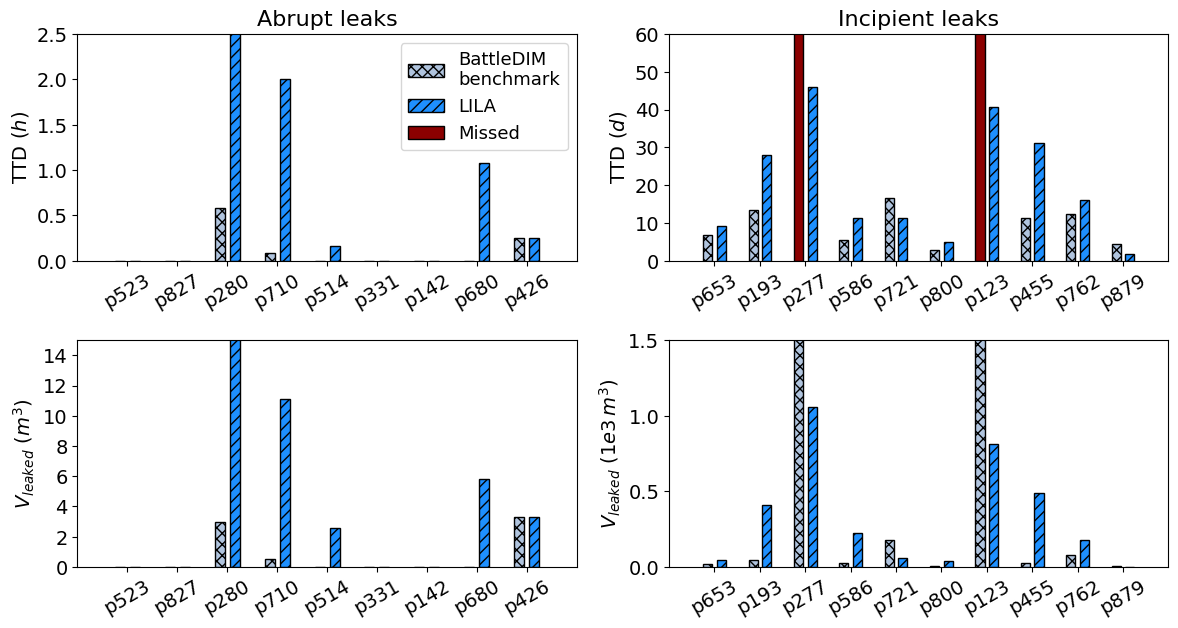

In [71]:
plt.style.use(['default'])
c = ['lightsteelblue','dodgerblue','darkred']

f,axs = plt.subplots(2,2,figsize=(12,6.5))

df_overview_abrupt = df_overview[df_overview['leak_type']=='abrupt'].dropna()
df_overview_incipient = df_overview[df_overview['leak_type']=='incipient']

x_shift = 0.15
x_expert = np.subtract([i for i in range(len(df_overview_abrupt))],x_shift)
x_cusum = np.add([i for i in range(len(df_overview_abrupt))],x_shift)#

ax = axs[0,0]
ax.bar(-100, 1, width=0.38, hatch='xxx', color=c[0], label='BattleDIM\nbenchmark', edgecolor='black')
ax.bar(-100, 1, width=0.38, hatch='///',color=c[1], label='LILA', edgecolor='black')
ax.bar(-100, 1, width=0.38, color=c[2], label='Missed', edgecolor='black')

ax.set_title('Abrupt leaks',fontsize=16)
ax.bar(x_expert , [i.total_seconds()/3600 if not pd.isna(i) else np.nan for i in df_overview_abrupt['delta_t_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i.total_seconds()/3600 if not pd.isna(i) else np.nan for i in df_overview_abrupt['delta_t_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('TTD ($h$)',fontsize=14)
ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_abrupt))])
ax.set_xlim([-1,len(df_overview_abrupt['delta_t_cusum'].index)])
ax.legend(loc=0,prop={'size':13})
ax.set_ylim(0,2.5)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

ax = axs[1,0]
ax.bar(x_expert , [i for i in df_overview_abrupt['delta_v_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i for i in df_overview_abrupt['delta_v_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('$V_{leaked}$ ($m^3$)',fontsize=14)
ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_abrupt))])
ax.set_xlim([-1,len(df_overview_abrupt['delta_t_cusum'].index)])
ax.set_ylim(0,15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

x_expert = np.subtract([i for i in range(len(df_overview_incipient))],x_shift)
x_cusum = np.add([i for i in range(len(df_overview_incipient))],x_shift)#

ax = axs[0,1]
ax.set_title('Incipient leaks',fontsize=16)
ax.bar(x_expert , [i.total_seconds()/3600/24 if not pd.isna(i) else np.nan for i in df_overview_incipient['delta_t_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar([2-x_shift] , [200], width=0.2, color=c[2], edgecolor='black') # missed annotation
ax.bar([6-x_shift] , [200], width=0.2, color=c[2], edgecolor='black') # missed annotation
ax.bar(x_cusum, [i.total_seconds()/3600/24 if not pd.isna(i) else np.nan for i in df_overview_incipient['delta_t_cusum']],
       width=0.2, hatch='///',color=c[1], edgecolor='black')
ax.set_ylabel('TTD ($d$)',fontsize=14)
ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_incipient))],)
ax.set_xlim([-1,len(df_overview_incipient['delta_t_cusum'].index)])
ax.set_ylim([0,60])
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

ax = axs[1,1]
ax.bar(x_expert , [i/1000 for i in df_overview_incipient['delta_v_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i/1000 for i in df_overview_incipient['delta_v_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('$V_{leaked}$ ($1e3\,m^3$)',fontsize=14)
ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_incipient))])
ax.set_xlim([-1,len(df_overview_incipient['delta_t_cusum'].index)])
ax.set_yticks([0,0.5,1,1.5])
ax.set_ylim(0,1.5)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

f.tight_layout(pad=1.5)
f.savefig('fig_comparison_cp_detection.png',dpi=300)

### Sensitivity study of thresholds on performance (Fig. 3)

<>:66: SyntaxWarning: invalid escape sequence '\,'
<>:68: SyntaxWarning: invalid escape sequence '\,'
<>:70: SyntaxWarning: invalid escape sequence '\,'
<>:74: SyntaxWarning: invalid escape sequence '\;'
<>:89: SyntaxWarning: invalid escape sequence '\,'
<>:91: SyntaxWarning: invalid escape sequence '\,'
<>:93: SyntaxWarning: invalid escape sequence '\,'
<>:97: SyntaxWarning: invalid escape sequence '\;'
<>:66: SyntaxWarning: invalid escape sequence '\,'
<>:68: SyntaxWarning: invalid escape sequence '\,'
<>:70: SyntaxWarning: invalid escape sequence '\,'
<>:74: SyntaxWarning: invalid escape sequence '\;'
<>:89: SyntaxWarning: invalid escape sequence '\,'
<>:91: SyntaxWarning: invalid escape sequence '\,'
<>:93: SyntaxWarning: invalid escape sequence '\,'
<>:97: SyntaxWarning: invalid escape sequence '\;'
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\2315923020.py:66: SyntaxWarning: invalid escape sequence '\,'
  df_expert_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,hour$'.format('

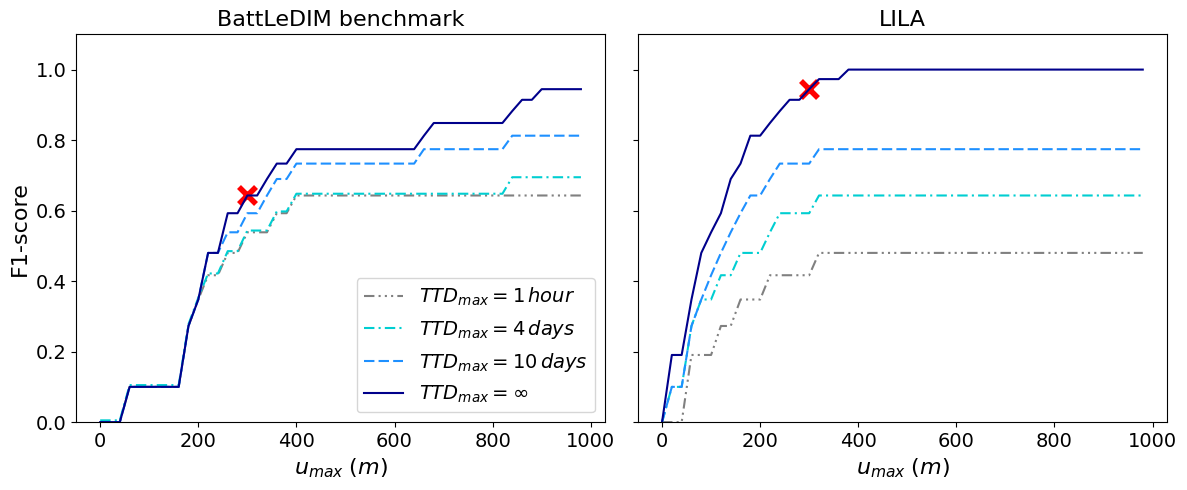

In [73]:
df_loc_dist = pd.read_csv('../_utils/Data/distancesGraph.csv',sep=';',index_col=0)
df_loc_dist.columns = ['True location','Leak type','BattLeDIM version', 'LILA','expert TTD','cusum TTD','expert V saved','cusum V saved']
df_loc_dist['BattLeDIM version'] = pd.to_numeric(df_loc_dist['BattLeDIM version'],errors='coerce')
df_loc_dist['LILA'] = pd.to_numeric(df_loc_dist['LILA'],errors='coerce')
df_loc_dist['expert TTD'] = pd.to_timedelta(df_loc_dist['expert TTD'])
df_loc_dist['cusum TTD'] = pd.to_timedelta(df_loc_dist['cusum TTD'])
df_loc_dist

t_res = 57*24/1+1
u_res = 20

df_expert_P = pd.DataFrame(dtype=float,
                             index=pd.timedelta_range(start='00:00:00',end='57 days 00:00:00', periods=t_res),
                             columns=np.arange(0,1000,u_res))
df_expert_R = pd.DataFrame(dtype=float,
                             index=pd.timedelta_range(start='00:00:00',end='57 days 00:00:00', periods=t_res),
                             columns=np.arange(0,1000,u_res))

df_cusum_P = pd.DataFrame(dtype=float,
                             index=pd.timedelta_range(start='00:00:00',end='57 days 00:00:00', periods=t_res),
                             columns=np.arange(0,1000,u_res))
df_cusum_R = pd.DataFrame(dtype=float,
                             index=pd.timedelta_range(start='00:00:00',end='57 days 00:00:00', periods=t_res),
                             columns=np.arange(0,1000,u_res))

for i_u,u_i in enumerate(df_expert_P.columns):
    for i_TTD,TTD_i in enumerate(df_expert_P.index):
        df_TP = df_loc_dist[(df_loc_dist['expert TTD']<TTD_i) & (df_loc_dist['expert TTD']>=df_expert_P.index[0]) & (df_loc_dist['BattLeDIM version']<=u_i)]
        if df_TP.empty:
            TP=0
        else:
            TP = df_TP.shape[0]
            
        df_expert_P.loc[TTD_i,u_i] = TP/18
        df_expert_R.loc[TTD_i,u_i] = TP/(TP+1)
            
        df_TP = df_loc_dist[(df_loc_dist['cusum TTD']<TTD_i) & (df_loc_dist['cusum TTD']>=df_expert_P.index[0]) & (df_loc_dist['LILA']<=u_i)]
        if df_TP.empty:
            TP=0
        else:
            TP = df_TP.shape[0]
        df_cusum_P.loc[TTD_i,u_i] = TP/19
        if TP == 0:
            df_cusum_R.loc[TTD_i,u_i] = 0
        else:
            df_cusum_R.loc[TTD_i,u_i] = 1
            
df_expert_F = 2*df_expert_P*df_expert_R/(df_expert_P+df_expert_R)
df_expert_F = df_expert_F.replace(np.nan,0)
df_expert_F.iloc[0,:]=0
df_expert_F.iloc[:,0]=0

df_cusum_F = 2*df_cusum_P*df_cusum_R/(df_cusum_P+df_cusum_R)
df_cusum_F = df_cusum_F.replace(np.nan,0)
df_cusum_F.iloc[0,:]=0
df_cusum_F.iloc[:,0]=0

plt.style.use(['default'])
fs = 14
fig, axs = plt.subplots(1,2,sharey=True,figsize=(12,5))

ax=axs[0]
ax.set_title('BattLeDIM benchmark',fontsize=16)
for i_TTD,TTD_i in enumerate(df_expert_P.index):
    if i_TTD in [1]:
        df_expert_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,hour$'.format('{max}',int(TTD_i.seconds/3600)),color='grey',ls=(0, (5, 2, 1, 2, 1, 2, 1, 2)))
    if i_TTD in [24*4]:
        (df_expert_F.loc[TTD_i,:]+0.005).plot(ax=ax,label='$TTD_{}={}\,days$'.format('{max}',TTD_i.days),color='darkturquoise',ls=(0, (5, 2, 1, 2)))
    if i_TTD in [24*10]:
        df_expert_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,days$'.format('{max}',TTD_i.days),color='dodgerblue',ls=(0, (5, 2)))
    if i_TTD in [24*57]:
        (df_expert_F.loc[TTD_i,:]).plot(ax=ax,label='$TTD_{}={}$'.format('{max}','\u221e'),color='darkblue')

ax.set_xlabel('$u_{max}\;(m)$',fontsize=16)
ax.set_ylabel('F1-score',fontsize=16)

ax.legend(loc=4,prop={'size':fs})
ax.set_ylim(0,1.1)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
ax.scatter(300,df_expert_F.loc[:,300].iloc[-1],c='r',marker='x',s=150,lw=4)

ax=axs[1]
ax.set_title('LILA',fontsize=16)
for i_TTD,TTD_i in enumerate(df_cusum_P.index):
    if i_TTD in [1]:
        df_cusum_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,hour$'.format('{max}',int(TTD_i.seconds/3600)),color='grey',ls=(0, (5, 2, 1, 2, 1, 2, 1, 2)))
    if i_TTD in [24*4]:
        df_cusum_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,days$'.format('{max}',TTD_i.days),color='darkturquoise',ls=(0, (5, 2, 1, 2)))
    if i_TTD in [24*10]:
        df_cusum_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}\,days$'.format('{max}',TTD_i.days),color='dodgerblue',ls=(0, (5, 2)))
    if i_TTD in [24*57]:
        df_cusum_F.loc[TTD_i,:].plot(ax=ax,label='$TTD_{}={}$'.format('{max}','\u221e'),color='darkblue')

ax.set_xlabel('$u_{max}\;(m)$',fontsize=16)
ax.set_ylabel('F1-score',fontsize=16)

ax.set_ylim(0,1.1)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
ax.scatter(300,df_cusum_F.loc[:,300].iloc[-1],c='r',marker='x',s=150,lw=4)
    

fig.tight_layout()
plt.show()
fig.savefig("Fscore_threshold_dependent.png",dpi=300)

### Plotting detection distances (Fig. 7)

C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\67910213.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_overview_abrupt['True location'],fontsize=fs,rotation=30)
C:\Users\dingr\AppData\Local\Temp\ipykernel_31060\67910213.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df_overview_incipient['True location'],fontsize=fs,rotation=30)


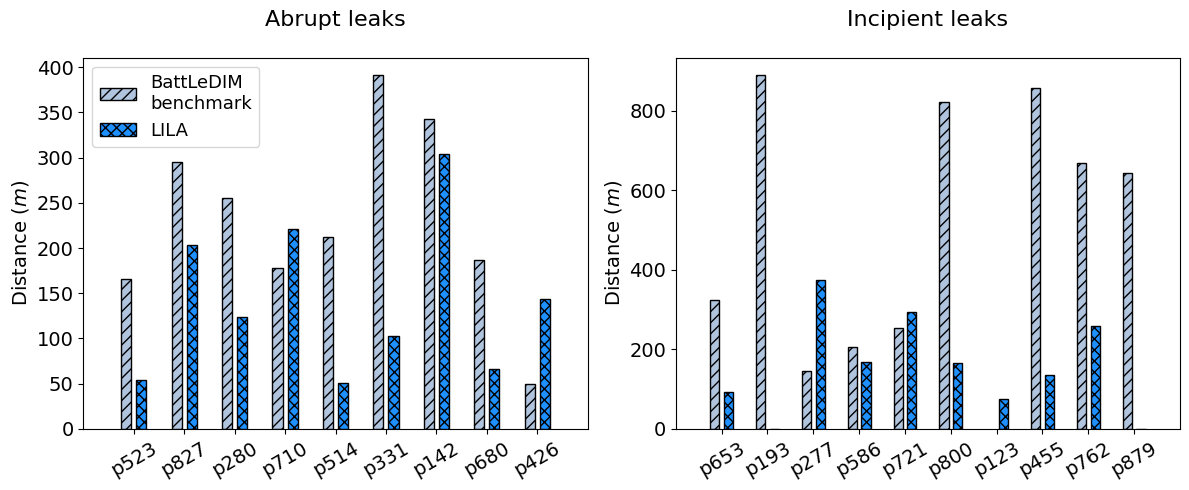

In [75]:
plt.style.use(['default'])
fs = 14
fig, ax = plt.subplots(1,2,figsize=(12,5))
width = 0.25
x_shift = 0.15

df_overview_abrupt = df_loc_dist[df_loc_dist['Leak type']=='abrupt']
df_overview_incipient = df_loc_dist[df_loc_dist['Leak type']=='incipient']

ax[0].bar(-100, 1, width=0.38, hatch='///',color='lightsteelblue', label='BattLeDIM\nbenchmark', edgecolor='black')
ax[0].bar(-100, 1, width=0.38, hatch='xxx', color='dodgerblue', label='LILA', edgecolor='black')

ax[0].set_title('Abrupt leaks\n',fontsize=16)

ax[0].bar(np.subtract([i for i in range(df_overview_abrupt.shape[0])],x_shift),
          df_overview_abrupt['BattLeDIM version'].values, 
          width=0.2, hatch='///',color='lightsteelblue', edgecolor='black')
ax[0].bar(np.add([i for i in range(df_overview_abrupt.shape[0])],x_shift),
          df_overview_abrupt['LILA'].values, 
          width=0.2, hatch='xxx', color='dodgerblue', edgecolor='black')

ax[0].set_ylabel('Distance ($m$)',fontsize=14)
ax[0].set_xticklabels(df_overview_abrupt['True location'],fontsize=fs,rotation=30)
ax[0].set_xticks([i for i in range(len(df_overview_abrupt))],)
ax[0].set_xlim([-1,len(df_overview_abrupt['True location'])])
for tick in ax[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    
ax[0].legend(loc=0,prop={'size':13})

ax[1].set_title('Incipient leaks\n',fontsize=16)
ax[1].bar(np.subtract([i for i in range(df_overview_incipient.shape[0])],x_shift),
          df_overview_incipient['BattLeDIM version'].values, 
          width=0.2, hatch='///',color='lightsteelblue', edgecolor='black')
ax[1].bar(np.add([i for i in range(df_overview_incipient.shape[0])],x_shift),
          df_overview_incipient['LILA'].values, 
          width=0.2, hatch='xxx', color='dodgerblue', edgecolor='black')

ax[1].set_ylabel('Distance ($m$)',fontsize=14)
ax[1].set_xticklabels(df_overview_incipient['True location'],fontsize=fs,rotation=30)
ax[1].set_xticks([i for i in range(len(df_overview_incipient))],)
ax[1].set_xlim([-1,len(df_overview_incipient['True location'])])
for tick in ax[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
fig.tight_layout()
fig.savefig("localization_distances.png",dpi=300)

### Leak/noise study (Fig. 9)

2.3.1


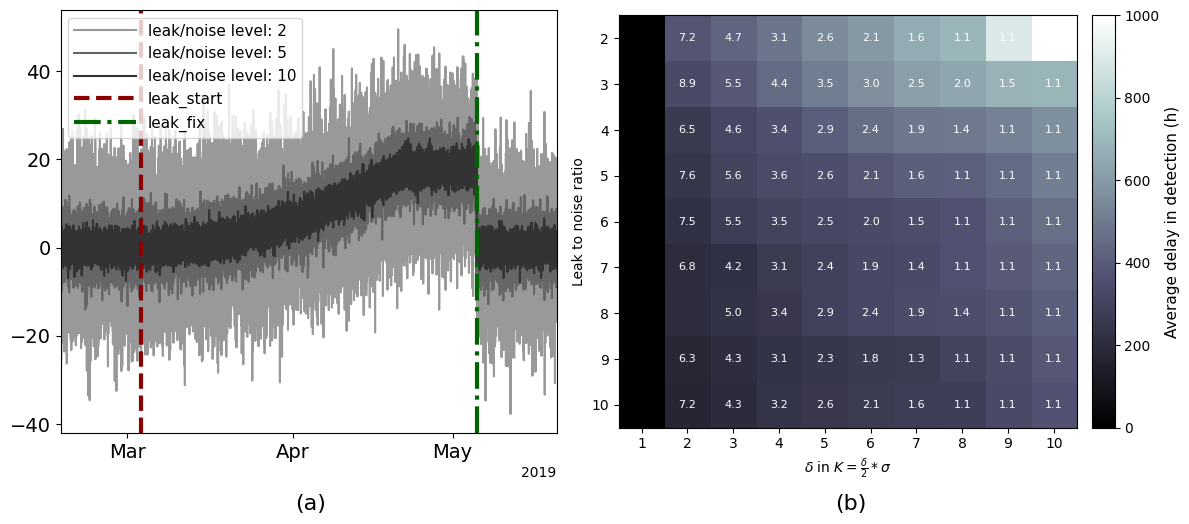

In [79]:
print(pd.__version__)
df_leak_true, df_overview_true = leak_signals, df_overview
df_leak_det = trajectories.copy()
fs = 14

# =============================================================================
#%% plots for theory-part
# =============================================================================
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

pipe = 'p653'

lst_col = [[255,255,255]]

for i, leak_to_noise in enumerate([2,5,10]):

    leak_magnitude = df_leak_true.max()
    noise_level = leak_magnitude[pipe]/leak_to_noise
    
    df_traj_sim = df_leak_true[pipe]
    
    df_noise = np.random.normal(0,noise_level, df_traj_sim.shape)
    
    # select analysis starting dates (5days prior to leak)
    delta_t = 15 #days
    search_start  = (df_overview_true['leak_start']-pd.Timedelta(delta_t, unit='D'))[pipe]
    search_end = (df_overview_true['leak_fix']+pd.Timedelta(delta_t, unit='D'))[pipe]
    
    df_traj_sim.loc[:search_start] = 0
    df_traj_sim.loc[search_end:] = 0
    
    df_traj_sim = (df_traj_sim + df_noise)

    ax[0].plot(df_traj_sim.loc[search_start:search_end], 
             c=np.add((0.6,0.6,0.6),np.multiply(i,(-0.2,-0.2,-0.2))),
             label=('leak/noise level: '+str(leak_to_noise)))
    
ax[0].axvline(df_overview_true['leak_start'][pipe], c='darkred', ls='--', lw=3, label='leak_start')
ax[0].axvline(df_overview_true['leak_fix'][pipe], c='darkgreen', ls='-.', lw=3, label='leak_fix')
ax[0].set_xlim([search_start, search_end])
ax[0].legend(loc=2,prop={'size':11},handlelength=4)

#ax[0].set_title('Incipient leak in pipe'+pipe,fontsize=14)
locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
formatter = mdates.ConciseDateFormatter(locator)
formatter.offset_formats[2] = '%Y'
ax[0].get_xaxis().set_major_locator(locator)
ax[0].get_xaxis().set_major_formatter(formatter)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)


df_sel = pd.read_pickle('../_utils/Data/df_simulation_results')

idx, col = np.unique(df_sel['leak_to_noise']), np.unique(df_sel['delta'])

df_plot = pd.DataFrame(np.zeros((len(idx), len(col))),
                       index = idx,
                       columns= col)

for col_ in col:
    for idx_ in idx:
        bool_sel = ((df_sel['leak_to_noise']==idx_) & (df_sel['delta']==col_))
        if df_sel['H'][bool_sel].values < 50:
            df_plot.loc[idx_, col_] = df_sel['avg_delta_t'][bool_sel].values
        else:
            df_plot.loc[idx_, col_] = df_sel['avg_delta_t'].max()
    

im_ = ax[1].imshow(df_plot, cmap='bone', vmin=0, vmax=1000) #cmap='RdBu_r'

ax[1].set_yticks([i for i in range(len(idx))])
ax[1].set_yticklabels(idx)
ax[1].set_ylabel('Leak to noise ratio')
ax[1].set_xticks([i for i in range(len(col))])
ax[1].set_xticklabels(col)
ax[1].set_xlabel(r'$\delta$ in $K=\frac{\delta}{2}*\sigma$')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.15)

cbar = fig.colorbar(im_, cax=cax)
cbar.set_label('Average delay in detection (h)', fontsize=11) 
for col_ in [i for i in range(len(col))]:
    for idx_ in [i for i in range(len(idx))]:
        bool_sel = ((df_sel['leak_to_noise']==idx[idx_]) & (df_sel['delta']==col[col_]))
        if df_sel['H'][bool_sel].values < 10:
            ax[1].text(col_, idx_, "%.1f" %df_sel['H'][bool_sel].values[0], size=8, c='white',
                     va="center", ha="center")

l1 = fig.text(0.25,-0.03,'(a)',fontsize=16)
l2 = fig.text(0.7,-0.03,'(b)',fontsize=16)
fig.tight_layout()
fig.savefig("leak_nose_investigation.png",dpi=300)

### Individual leak trajectories (Fig. 5)

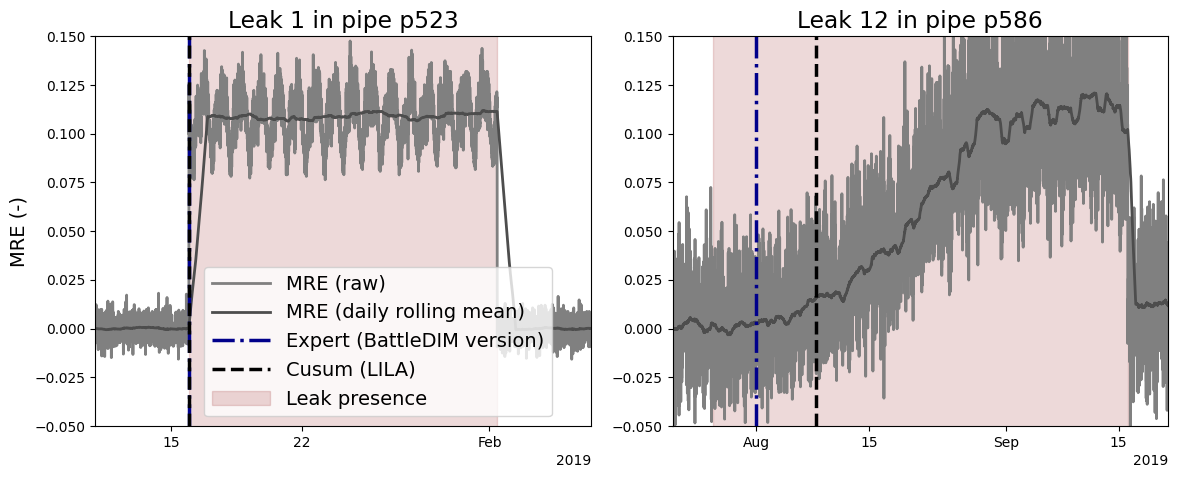

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

font = {'size'   : 14}
plt.rc('font', **font)


lst_pipes = ['p523', 'p586']
lst_titles = ['Leak 1 in pipe {}'.format(lst_pipes[0]), 'Leak 12 in pipe p586']
lst_det_cusum = ['2019-01-15 23:00:00', '2019-08-08 09:20:00']
lst_det_expert = ['2019-01-15 23:00:00', '2019-08-01 00:30']
lst_col = [[255,255,255]]

ax[0].set_ylabel('MRE (-)', size=14)


for i, pipe in enumerate(lst_pipes):
    
    df_traj_ = df_leak_det[pipe]
    
    # select analysis starting dates (10days prior to leak)
    delta_t = 5 #days
    search_start  = (df_overview_true['leak_start']-pd.Timedelta(delta_t, unit='D'))[pipe]
    search_end = (df_overview_true['leak_fix']+pd.Timedelta(delta_t, unit='D'))[pipe]
    
    df_traj_.loc[:search_start] = 0
    df_traj_.loc[search_end:] = 0
    
    
    ax[i].plot(df_traj_.loc[search_start:search_end], c=(0.5,0.5,0.5), lw=2)
    ax[i].plot(df_traj_.rolling(24*12).mean().loc[search_start:search_end], c=(0.3,0.3,0.3), lw=2)
    
    
    ax[i].axvline(pd.Timestamp(lst_det_expert[i]), c='darkblue', ls='-.', lw=2.5, label='Expert annotation')

    ax[i].axvline(pd.Timestamp(lst_det_cusum[i]), c='k', ls='--', lw=2.5, label='Cusum annotation')
    
    ax[i].fill_between([df_overview_true['leak_start'][pipe], df_overview_true['leak_fix'][pipe]], [1,1], [-1,-1], color='darkred', alpha=0.15)

    ax[i].set_xlim([search_start, search_end])
    ax[i].set_ylim([-0.05, 0.15])
    
    ax[i].set_title(lst_titles[i])
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.offset_formats[2] = '%Y'
    ax[i].get_xaxis().set_major_locator(locator)
    ax[i].get_xaxis().set_major_formatter(formatter)

# hack for legend
ax[1].bar(-100, 1, width=0.38,color='darkred', alpha=0.3, label='expert')

ax[0].legend(['MRE (raw)', 'MRE (daily rolling mean)', 'Expert (BattleDIM version)', 'Cusum (LILA)', 'Leak presence'],
           loc='lower center',bbox_to_anchor=(0.32, 0, 0.5, 0.75), handlelength=3)

fig.tight_layout()
fig.savefig("individual_leak_trajectories.png",dpi=300)